# Genrefy Project

Kellie Colson & Ghar Pautz  
CPSC 322, Spring 2021  

# Introduction

We are using a dataset from Kaggle titled *Music Dataset 1950 to 2019*. The dataset contains 29 different attributes to describe different song instances from the years 1950 to 2019. One of the dataset attributes is *genre* which we will use as our classifier for this project. Most of the other attributes in the dataset are music measurements such as accousticness, loudness, or danceability so these attributes will be used to train a classification model to predict the genre. 

# Data Analysis


## Exploratory Data Analysis

In [24]:
from mysklearn import mypytable as mpt
import importlib
from mysklearn import myutils
from mysklearn import myevaluation
import random
import math
from mysklearn import plot_utils as plt
import matplotlib.pyplot as mplt
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyDecisionTreeClassifier, MyRandomForestClassifier, MyNaiveBayesClassifier

table = mpt.MyPyTable().load_from_file("tcc_ceds_music.csv")
numrows, numcols = table.get_shape()
print("Original Table Num Rows: ", numrows)
print("Original Table Num Cols: ", numcols)

new_table = myutils.get_even_classifier_instances(table)
genre_col = myutils.get_column(new_table.data, new_table.column_names, "genre")
new_table = myutils.categorize_values(new_table)
new_numrows, new_numcols = new_table.get_shape()

print("Cleaned Table Num Rows: ", new_numrows)
print("Cleaned Table Num Cols: ", new_numcols)
print("Cleaned Table Col Names: ", new_table.column_names)

Original Table Num Rows:  28372
Original Table Num Cols:  29
Cleaned Table Num Rows:  6328
Cleaned Table Num Cols:  23
Cleaned Table Col Names:  ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']


In [9]:
columns = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']
sum_table = table.compute_summary_statistics(columns)
sum_table.pretty_print()

# use attributes with most variability

attribute                         min         max         mid         avg       median
------------------------  -----------  ----------  ----------  ----------  -----------
len                       1            199         100         73.0284     63
dating                    0.000290782    0.647706    0.323998   0.0211116   0.00146199
violence                  0.000284495    0.981781    0.491033   0.118396    0.00250627
world/life                0.000290782    0.962105    0.481198   0.120973    0.00657895
night/time                0.000289185    0.973684    0.486987   0.0573871   0.00194932
shake the audience        0.000284495    0.497463    0.248874   0.0174224   0.0015949
family/gospel             0.000289185    0.545303    0.272796   0.0170454   0.00150376
romantic                  0.000284495    0.940789    0.470537   0.048681    0.00175439
communication             0.000290782    0.645829    0.32306    0.0766798   0.00263158
obscene                   0.000289185    0.992298    

## Distributions

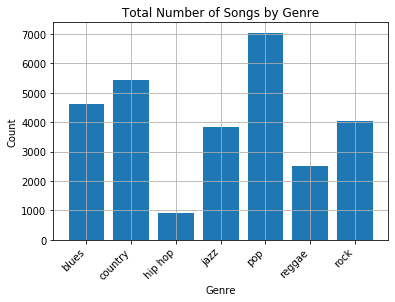

In [10]:
genres = table.get_column('genre')
x, y = myutils.get_value_counts(genres)

title = "Total Number of Songs by Genre"
xlabel = "Genre"
plt.make_frequency_diagram(x, y, title, xlabel)

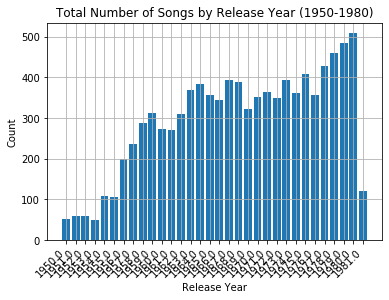

In [11]:
release_dates = table.get_column('release_date')
release_dates.sort()
n = len(release_dates)

x, y = myutils.get_value_counts(release_dates[:n // 3])
title = "Total Number of Songs by Release Year (1950-1980)"
xlabel = "Release Year"
plt.make_frequency_diagram(x, y, title, xlabel)

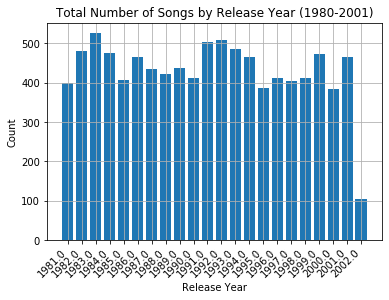

In [12]:
x, y = myutils.get_value_counts(release_dates[n // 3:2 * (n // 3)])
title = "Total Number of Songs by Release Year (1980-2001)"
xlabel = "Release Year"
plt.make_frequency_diagram(x, y, title, xlabel)

1981.0


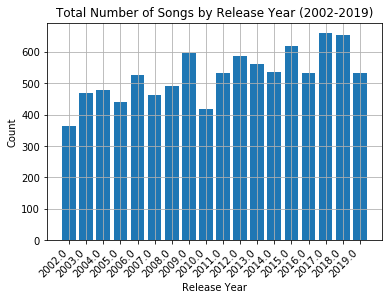

In [13]:
n = len(release_dates)

print(release_dates[n // 3])
x, y = myutils.get_value_counts(release_dates[2 * (n // 3):])
title = "Total Number of Songs by Release Year (2002-2019)"
xlabel = "Release Year"
plt.make_frequency_diagram(x, y, title, xlabel)

## Load the column data

In [14]:
print(table.column_names)
dating_ratings = table.get_column('dating')
violence_ratings = table.get_column('violence')
life_ratings = table.get_column('world/life')
night_ratings = table.get_column('night/time')
shake_ratings = table.get_column('shake the audience')
gospel_ratings = table.get_column('family/gospel')
romance_ratings = table.get_column('romantic')
comm_ratings = table.get_column('communication')
obscene_ratings = table.get_column('obscene')
dance_ratings = table.get_column('danceability')
energy_ratings = table.get_column('energy')

['artist_name', 'track_name', 'release_date', 'genre', 'len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'topic', 'age']


# Linear Regression

## Violence vs. Obscenity

In [15]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(violence_ratings, obscene_ratings, \
                                                                 test_size=5, shuffle=True)
line_reg = MySimpleLinearRegressor()
line_reg.fit(X_train, y_train)

In [16]:
test_list = []
for i in range(0, len(X_test)):
    test_list.append([X_test[i]])

predictions = line_reg.predict(test_list)
for i in range(0, len(test_list)):
    print("Violence:", X_test[i], "\t Predicted Obscenity Rating:", predictions[i], \
          "\t Actual Obscenity Rating:", y_test[i])

Violence: 0.001461988 	 Predicted Obscenity Rating: 0.11613842228529683 	 Actual Obscenity Rating: 0.001461988
Violence: 0.001253133 	 Predicted Obscenity Rating: 0.11617227574363856 	 Actual Obscenity Rating: 0.001253133
Violence: 0.001644737 	 Predicted Obscenity Rating: 0.11610880036741845 	 Actual Obscenity Rating: 0.051654634
Violence: 0.315828054 	 Predicted Obscenity Rating: 0.06518259877434412 	 Actual Obscenity Rating: 0.003759399
Violence: 0.001949318 	 Predicted Obscenity Rating: 0.11605943061234829 	 Actual Obscenity Rating: 0.001949318


b: 0.1163541984694277
m: -0.1620514704900011


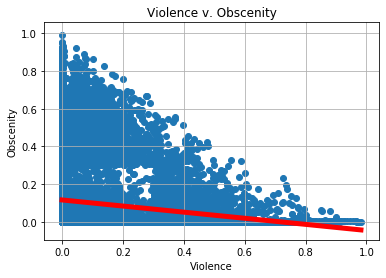

In [17]:
b,m = myutils.calculate_linear_regression(violence_ratings, obscene_ratings)
print("b:", b)
print("m:", m)

mplt.title("Violence v. Obscenity")
mplt.xlabel("Violence")
mplt.ylabel("Obscenity")
mplt.scatter(violence_ratings, obscene_ratings)
mplt.plot([min(violence_ratings), max(violence_ratings)], [m * min(violence_ratings) + b, m * max(violence_ratings) + b],\
          c="r", lw=5);
mplt.grid(True);

## Danceability vs. Energy

In [18]:
X_train, X_test, y_train, y_test = myevaluation.train_test_split(dance_ratings, energy_ratings, \
                                                                 test_size=5, shuffle=True)
line_reg = MySimpleLinearRegressor()
line_reg.fit(X_train, y_train)

test_list = []
for i in range(0, len(X_test)):
    test_list.append([X_test[i]])

predictions = line_reg.predict(test_list)
for i in range(0, len(test_list)):
    print("Danceability:", X_test[i], "\t Predicted Energy Rating:", predictions[i], \
          "\t Actual Energy Rating:", y_test[i])

Danceability: 0.696739955 	 Predicted Energy Rating: 0.5736455996533689 	 Actual Energy Rating: 0.468451868
Danceability: 0.392396837 	 Predicted Energy Rating: 0.5666199396127604 	 Actual Energy Rating: 0.448431222
Danceability: 0.18986245 	 Predicted Energy Rating: 0.5619445003948608 	 Actual Energy Rating: 0.931929806
Danceability: 0.365320048 	 Predicted Energy Rating: 0.565994880910085 	 Actual Energy Rating: 0.424406448
Danceability: 0.59168201 	 Predicted Energy Rating: 0.5712203718020366 	 Actual Energy Rating: 0.601589159


b: 0.5576267751346883
m: 0.022964785661726314


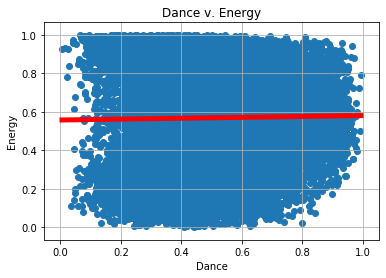

In [19]:
b,m = myutils.calculate_linear_regression(dance_ratings, energy_ratings)
print("b:", b)
print("m:", m)

mplt.title("Dance v. Energy")
mplt.xlabel("Dance")
mplt.ylabel("Energy")
mplt.scatter(dance_ratings, energy_ratings)
mplt.plot([min(dance_ratings), max(dance_ratings)], [m * min(dance_ratings) + b, m * max(dance_ratings) + b],\
          c="r", lw=5);
mplt.grid(True);

## KNN Classifier

In [21]:
k = 10

X = []
X.append(new_table.get_column("sadness"))
X.append(new_table.get_column("feelings"))
X.append(new_table.get_column("danceability"))
X.append(new_table.get_column("loudness"))
X.append(new_table.get_column("acousticness"))
X.append(new_table.get_column("instrumentalness"))
X.append(new_table.get_column("valence"))
X.append(new_table.get_column("energy"))
X = myutils.transpose(X)
y = genre_col
train_folds, test_folds = myevaluation.stratified_kfold_cross_validation(X, y, k)

sadness_index = new_table.column_names.index("sadness")
feelings_index = new_table.column_names.index("feelings")
danceability_index = new_table.column_names.index("danceability")
loudness_index = new_table.column_names.index("loudness")
acousticness_index = new_table.column_names.index("acousticness")
instrumentalness_index = new_table.column_names.index("instrumentalness")
valence_index = new_table.column_names.index("valence")
energy_inidex = new_table.column_names.index("energy")
#genre_index = new_table.column_names.index("genre")

predictive_accuracies = []
for i in range(k):
    train_indices = train_folds[i]
    # get 10 random test indices from test_folds[i]
    test_indices = []
    for j in range(10):
        rand_index = random.randint(0, len(test_folds[i]))
        test_indices.append(test_folds[i][rand_index])

    train = []
    y_train = []
    for index in train_indices:
        train.append(new_table.data[index][sadness_index : energy_inidex])
        #y_train.append(new_table.data[index][genre_index])
        y_train.append(genre_col[index])

    test = []
    y_test = []
    for index in test_indices:
        test.append(new_table.data[index][sadness_index : energy_inidex])
        #y_test.append(new_table.data[index][genre_index])
        y_test.append(genre_col[index])

    # run nearest neighbor classification
    mykneighbors = MyKNeighborsClassifier(n_neighbors = k)
    MyKNeighborsClassifier.fit(mykneighbors, train, y_train)
    predicted = MyKNeighborsClassifier.predict(mykneighbors, test)

    accuracy_count = 0
    for i in range(len(predicted)):
        if predicted[i] == y_test[i]:
            accuracy_count += 1
    predictive_accuracies.append(accuracy_count/len(predicted))

avg_accuracy = myutils.average(predictive_accuracies)
error = math.sqrt((avg_accuracy*(1-avg_accuracy)) / (k * len(predicted))) 

# print results
print("=================================================================")
print("Predictive Accuracy Stratified k-Fold Cross Validation")
print("=================================================================")
print("Stratified 10-Fold Cross Validation")
print("k Nearest Neighbors: accuracy = ", avg_accuracy, ", error rate = ", error)

Predictive Accuracy Stratified k-Fold Cross Validation
Stratified 10-Fold Cross Validation
k Nearest Neighbors: accuracy =  0.3000000000000001 , error rate =  0.045825756949558406


# Naive Bayes Classifier

In [7]:
import mysklearn.myclassifiers as myclassifiers
importlib.reload(myclassifiers)

k = 10

train_folds, test_folds = myevaluation.stratified_kfold_cross_validation(X, y, k)

predictive_accuracies = []
for i in range(k):
    train_indices = train_folds[i]
    # get 10 random test indices from test_folds[i]
    test_indices = []
    for j in range(10):
        rand_index = random.randint(0, len(test_folds[i]))
        test_indices.append(test_folds[i][rand_index])

    train = []
    y_train = []
    for index in train_indices:
        train_instance = new_table.data[index][sadness_index : energy_inidex]
        #train_instance.append(new_table.data[index][genre_index])
        train_instance.append(genre_col[index])
        train.append(train_instance)
        #y_train.append(new_table.data[index][genre_index])
        y_train.append(genre_col[index])

    test = []
    y_test = []
    for index in test_indices:
        test.append(new_table.data[index][sadness_index : energy_inidex])
        #y_test.append(new_table.data[index][genre_index])
        y_test.append(genre_col[index])
 

    # run naive bayes classifier
    my_naive_classifier = MyNaiveBayesClassifier()
    my_naive_classifier.fit(train, y_train)
    predicted = my_naive_classifier.predict(test)

    # calculate predictive accuracy
    N = len(test)
    C = 0
    for i in range(len(predicted)):
        if predicted[i] == y_test[i]:
            C += 1
    predictive_accuracies.append(C/N)
p = myutils.average(predictive_accuracies)
error = math.sqrt((p*(1-p)) / (k * N))

print("=================================================================")
print("Naive Bayes Classifier: Predictive Accuracy Stratified 10-Fold Cross Validation")
print("=================================================================")
print("Naive Bayes: accuracy = ", p, ", error rate = ", error)

Naive Bayes Classifier: Predictive Accuracy Stratified 10-Fold Cross Validation
Naive Bayes: accuracy =  0.37 , error rate =  0.048280430818293245


# Random Forest Classifier

In [23]:
k = 10
stitched_train = [X[i] + [y[i]] for i in range(0, len(X))]

X_train_folds, X_test_folds = myevaluation.stratified_kfold_cross_validation(X, y, k)

accuracies = []
for i in range(0, len(X_train_folds)):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for train_index in X_train_folds[i]:
        X_train.append(X[train_index])
        y_train.append(y[train_index])
    for test_index in X_test_folds[i]:
        X_test.append(stitched_train[test_index])
        y_test.append(y[test_index])
        
    myRF = MyRandomForestClassifier(N=5, M=2, F=4)
    myRF.fit(X_train, y_train)
    predictions = myRF.predict(X_test)
    
    accuracy, error_rate = myutils.calculate_predictive_accuracy(predictions, y_test)
    accuracies.append(accuracy)
    
predictive_accuracy = sum(accuracies) / len(accuracies)
print("=================================================================")
print("Random Forest Classifier: Predictive Accuracy Stratified 10-Fold Cross Validation")
print("=================================================================")
print("accuracy:", predictive_accuracy, "error rate:", 1 - predictive_accuracy)

Random Forest Classifier: Predictive Accuracy Stratified 10-Fold Cross Validation
accuracy: 0.327095456636071 error rate: 0.672904543363929


# Classification Results

* Techniques Used

Subsampling same number of instances for each classifier in the dataset, stratefied k-fold cross validation, categorizing normalized values 

* Classifier Design & Implementation

Knn & Naive Bayes classifiers implemented from previous programming assignments. Random Forest Classifier implemented by generating M trees with different training sets and F random attributes selected. The best M trees were selected by the calculed accuracy of each tree. 

* How performance was evaluated

Classifier performance was measured by calculated average accuracies and error rates after doing stratefied k-fold cross validation.

* Comparison Results

Each classifier (Knn, Naive Bayes, Random Forest) performed about the same. The Knn classifier averaged a 30% accuracy and 4.5% error rate. The Naive Bayes classifier averaged a 37% accuracy and 4.8% error rate. Finally, the Random Forest classifier averaged a 33% accuracy rate, so eveidently, our dataset was not well suited for classification given these low accuracy ratings. 

* Best Classifier

As stated above, none of the classifiers were very accurate or successful. However, we decided to deploy the Knn classifier and the link to the Heroku app is below. 

Heroku App Link: [https://genrefy-app-322.herokuapp.com/predict]

# Conclusion

We ran KNN, Naive Bayes, and Random Forest classifiers over our music dataset to classify the genre of a song, however, none of the classifiers were particularly accurate. We got between a 30% and 50% accuracy rate for each classifier, which is not very good. Having run multiple classifiers and following the same procedure by using stratefied k-fold cross validation and measuring the accuracy, we have determined that our dataset is not well suited for classification by genre.

## Dataset

Our dataset is from Kaggle and can be found at the following link: [https://www.kaggle.com/saurabhshahane/music-dataset-1950-to-2019]

The dataset has 28373 instances and 29 attributes, however we only used about 9 of those attributes, 8 for training (below) and 1 (genre) for classification.

1. sadness
2. feelings
3. danceability
4. loudness
5. accousticness
6. instrumentalness
7. valence
8. energy

We paired down our dataset by selecting the same number of instances for each genre classifier since it was so heavily skewed towards pop songs. Also, we categorized our data points on a scale from 1-10 since our data points were infinite decimals between 0 and 1. 

## Improvements

Perhaps choosing a different set of attributes and looking more into some strong relationships between pairs of attributes could have resulted in better classification results. 

Exploring the idea of classifying on a different attribute for our dataset perhaps also could have been more successful than classifying the genre